In [1]:
import os
import pandas as pd
from datetime import date, timedelta
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#dir = 'results/life_acc=None demand_rmse=None min_m=500 max_m=1000'
#dir = 'results/inv life_acc=None demand_rmse=None min_m=500 max_m=1000'
#dir = 'results/inv segm life_acc=None demand_rmse=None min_m=500 max_m=1000'
dir = 'results/inv life_acc=1.0 demand_rmse=0.4 min_m=500 max_m=1000'
min_date = date(2019, 3, 31)

In [3]:
datasets = list()
for file in os.listdir(dir):
    df = pd.read_csv(dir+'/%s' %file)
    d = {'incomes': df['incomes'], 'costs': df['costs'], 'profit': df['profit']}
    datasets.append(d)
dates_list = [min_date+timedelta(days=i) for i in list(df.index)]

In [4]:
def avg_fin(agg_func: str, fin: str):
    all_fins = [d[fin] for d in datasets]
    fin_l = list()
    for i in range(all_fins[0].shape[0]):
        if agg_func == 'avg':
            fin_l.append(np.mean([d.iloc[i] for d in all_fins]))
        elif agg_func == 'min':
            fin_l.append(min([d.iloc[i] for d in all_fins]))
        elif agg_func == 'max':
            fin_l.append(max([d.iloc[i] for d in all_fins]))
    return fin_l

In [5]:
avg_income = pd.Series(data=avg_fin('avg', 'incomes'), index=dates_list)
avg_costs = pd.Series(data=[-i for i in avg_fin('avg', 'costs')], index=dates_list)
avg_profit = pd.Series(data=avg_fin('avg', 'profit'), index=dates_list)
min_profit = pd.Series(data=avg_fin('min', 'profit'), index=dates_list)
max_profit = pd.Series(data=avg_fin('max', 'profit'), index=dates_list)

In [6]:
def dollar_format(value):
    return r"${:,}".format(value).replace(',', ' ')

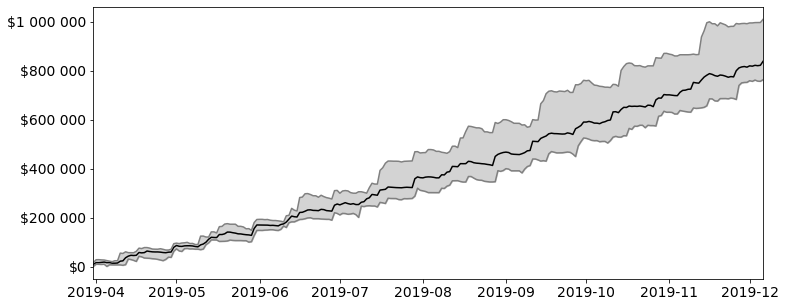

In [7]:
from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda x_val, tick_pos: r"${:,.0f}".format(x_val).replace(',', ' ').replace('$-', '-$'))

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 1, 1)
ax.tick_params(labelsize=14)

avg_profit.plot(color='black')
min_profit.plot(color='grey')
max_profit.plot(color='grey')
ax.fill_between(dates_list, max_profit, min_profit, color='lightgrey')
ax.yaxis.set_major_formatter(formatter)

plt.show()

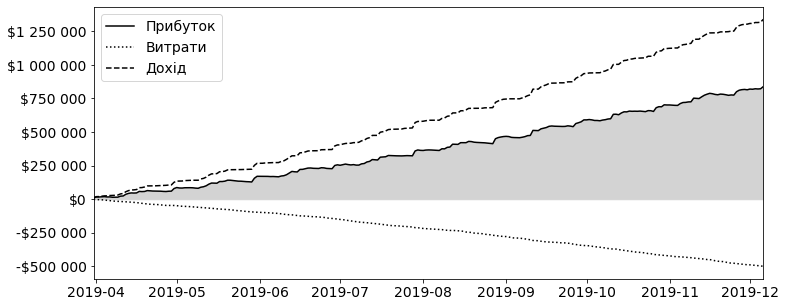

In [8]:
from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda x_val, tick_pos: r"${:,.0f}".format(x_val).replace(',', ' ').replace('$-', '-$'))

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 1, 1)
ax.tick_params(labelsize=14)

avg_profit.plot(color='black')
avg_costs.plot(color='black', linestyle=':')
avg_income.plot(color='black', linestyle='--')
ax.fill_between(dates_list, avg_profit, color='lightgrey')
ax.yaxis.set_major_formatter(formatter)

plt.legend(('Прибуток', 'Витрати', 'Дохід'), fontsize=14)
plt.show()

In [9]:
print('Min profit: %s' % min_profit[-1])
print('Avg profit: %s' % avg_profit[-1])
print('Max profit: %s' % max_profit[-1])

Min profit: 763619.2347757483
Avg profit: 838512.1648899938
Max profit: 1009815.0060518968
